# 1 读取数据

In [1]:
#读取数据
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rc("font",family="SimHei",size="15")
matplotlib.rcParams['axes.unicode_minus']=False

path = r'D:\DataSet\bank-additional\bank-additional-full.csv'
df_BankMarketing = pd.read_csv(path)

In [2]:
#将前十行数据展示出来
df_BankMarketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#查看数据的基本特征
df_BankMarketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2 数据预处理

In [4]:
df_BankMarketing.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#数据集中虽然没有缺失值，但是存在很多的unknown字段，有的unknown字段需要视为缺失值来处理
#统计各列unknown字段的个数
for col in df_BankMarketing.columns:
    if type(df_BankMarketing[col][0]) is str:
        print('unknown value count in'+col+':'+  
              str(df_BankMarketing[df_BankMarketing[col] == 'unknown']['y'].count())
             )

unknown value count injob:330
unknown value count inmarital:80
unknown value count ineducation:1731
unknown value count indefault:8597
unknown value count inhousing:990
unknown value count inloan:990
unknown value count incontact:0
unknown value count inmonth:0
unknown value count inday_of_week:0
unknown value count inpoutcome:0
unknown value count iny:0


In [6]:
#job与marital中的unknown的个数较少，可以直接做删除处理
#其余特征的unknown作为该列的一个取值保留

for i in range(0,len(df_BankMarketing)):
    if df_BankMarketing.loc[i,'job'] == 'unknown':
        df_BankMarketing.loc[i,'job'] = np.NAN
    if df_BankMarketing.loc[i,'marital'] == 'unknown':
        df_BankMarketing.loc[i,'marital'] = np.NAN

#删除缺失值
df_BankMarketing = df_BankMarketing.dropna()

#重新编辑行号
df_BankMarketing.index = range(0,len(df_BankMarketing))

In [7]:
df_BankMarketing['job'].value_counts()

admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: job, dtype: int64

In [8]:
df_BankMarketing['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

# 3 特征理解

## 3.1 客户特征

### 3.1.1 年龄

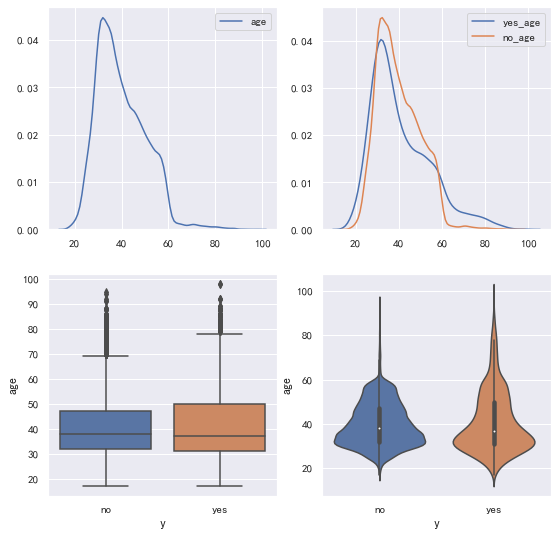

In [9]:
plt.figure(figsize=(9,9))

plt.subplot(2,2,1)
sns.kdeplot(df_BankMarketing['age'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['age']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['age']
sns.kdeplot(y,label="yes_age")
sns.kdeplot(n,label="no_age")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='age',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='age',data=df_BankMarketing)


### 3.1.2 工作类型

In [10]:
df_BankMarketing['job'].value_counts()

admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

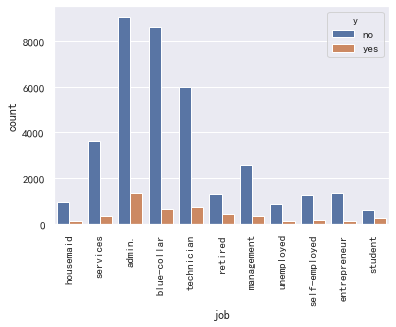

In [11]:
sns.countplot(x='job',hue='y',data=df_BankMarketing)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'no')

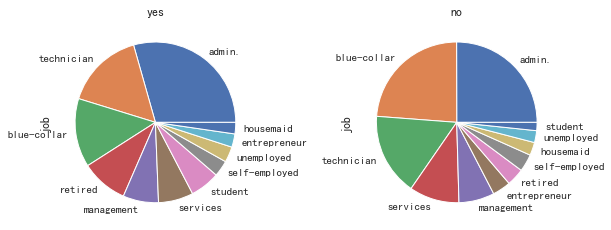

In [12]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['job'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['job'].value_counts().plot(kind='pie')
plt.title('no')

### 3.1.3 婚姻状况

In [13]:
df_BankMarketing['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

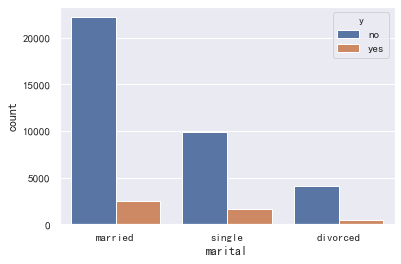

In [14]:
sns.countplot(x='marital',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

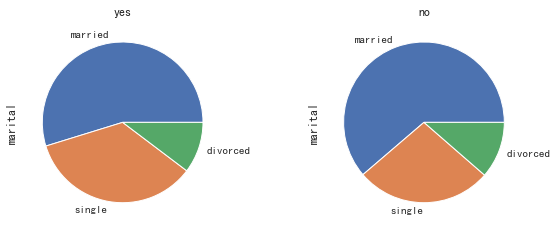

In [15]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['marital'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['marital'].value_counts().plot(kind='pie')
plt.title('no')

### 3.1.4 教育背景

In [16]:
df_BankMarketing['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

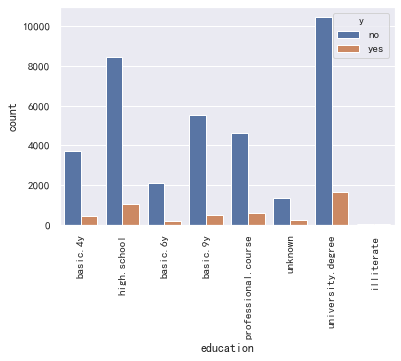

In [17]:
sns.countplot(x='education',hue='y',data=df_BankMarketing)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'no')

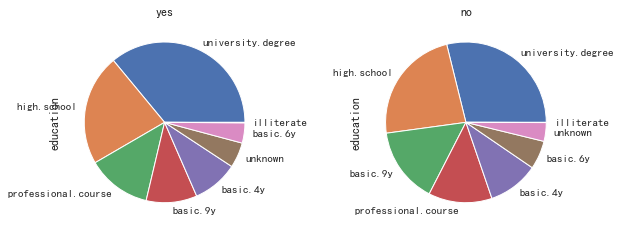

In [18]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['education'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['education'].value_counts().plot(kind='pie')
plt.title('no')

### 3.1.5 是否有过违约

In [19]:
df_BankMarketing['default'].value_counts()

no         32348
unknown     8436
yes            3
Name: default, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

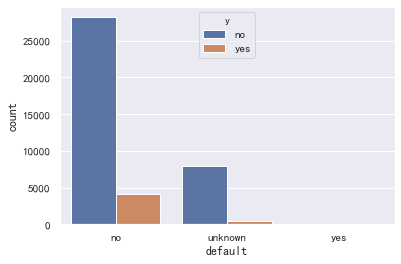

In [20]:
sns.countplot(x='default',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

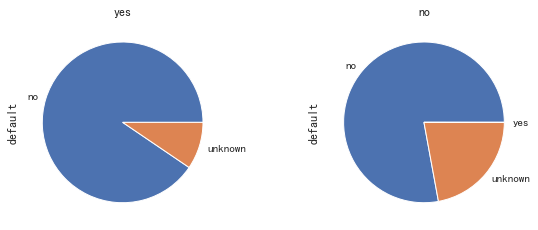

In [21]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['default'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['default'].value_counts().plot(kind='pie')
plt.title('no')

### 3.1.6 是否有住房贷款

In [22]:
df_BankMarketing['housing'].value_counts()

yes        21376
no         18427
unknown      984
Name: housing, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

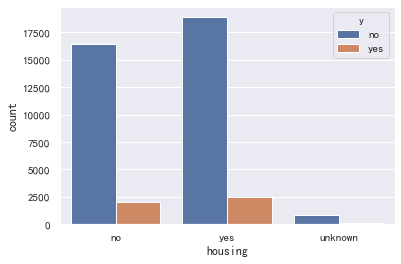

In [23]:
sns.countplot(x='housing',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

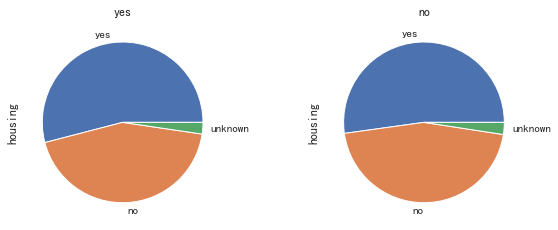

In [24]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['housing'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['housing'].value_counts().plot(kind='pie')
plt.title('no')

### 3.1.7 是否有个人贷款

In [25]:
df_BankMarketing['loan'].value_counts()

no         33620
yes         6183
unknown      984
Name: loan, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

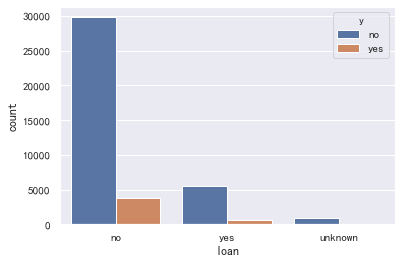

In [26]:
sns.countplot(x='loan',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

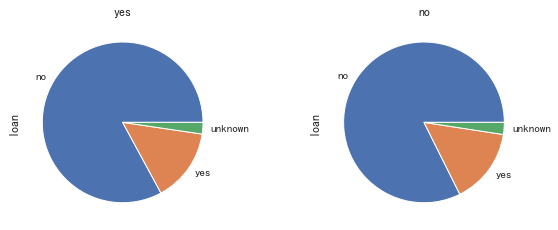

In [27]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['loan'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['loan'].value_counts().plot(kind='pie')
plt.title('no')

## 3.2 营销活动特征

### 3.2.1 联系方式

(array([0, 1]), <a list of 2 Text xticklabel objects>)

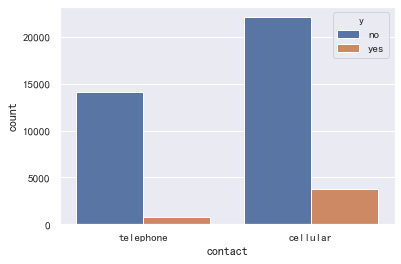

In [28]:
sns.countplot(x='contact',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

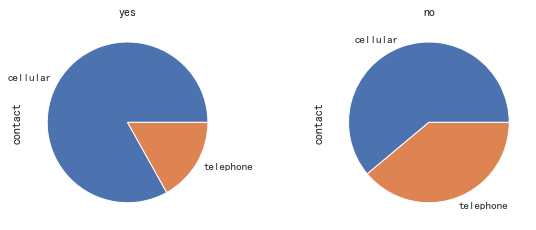

In [29]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['contact'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['contact'].value_counts().plot(kind='pie')
plt.title('no')

### 3.2.2 最后一次联系的月份

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

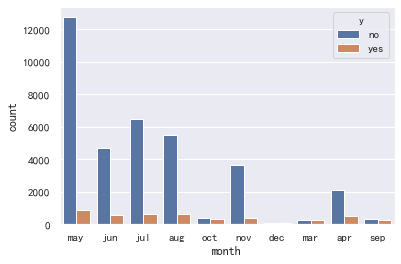

In [30]:
sns.countplot(x='month',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

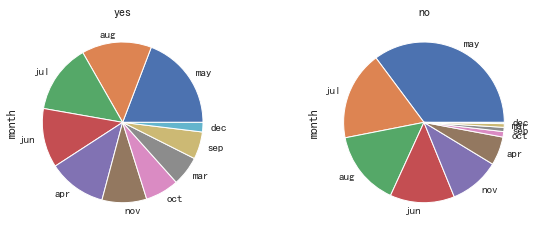

In [31]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['month'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['month'].value_counts().plot(kind='pie')
plt.title('no')

### 3.2.3 最后一次联系的星期

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

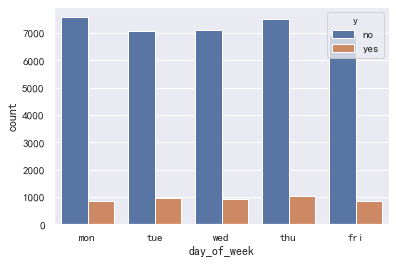

In [32]:
sns.countplot(x='day_of_week',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

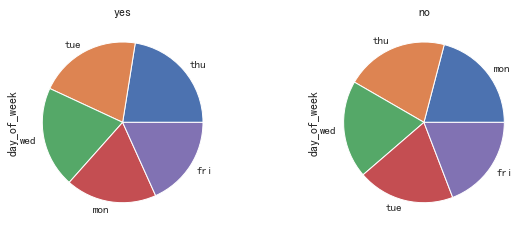

In [33]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['day_of_week'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['day_of_week'].value_counts().plot(kind='pie')
plt.title('no')

### 3.2.4 最后一次联系的时长

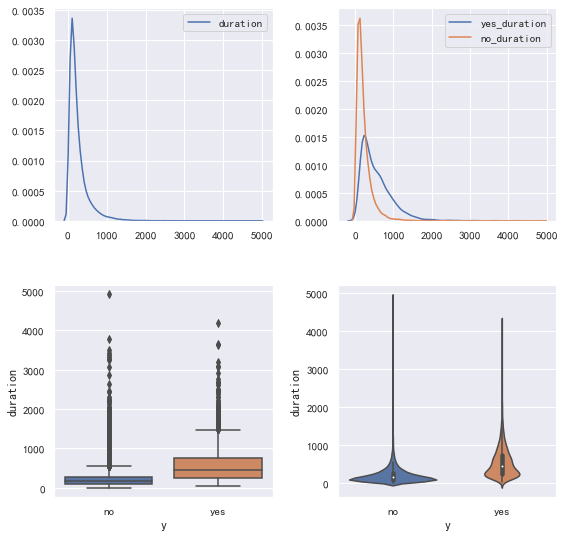

In [34]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.kdeplot(df_BankMarketing['duration'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['duration']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['duration']
sns.kdeplot(y,label="yes_duration")
sns.kdeplot(n,label="no_duration")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='duration',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='duration',data=df_BankMarketing)

### 3.2.4 此次营销活动期间联系次数

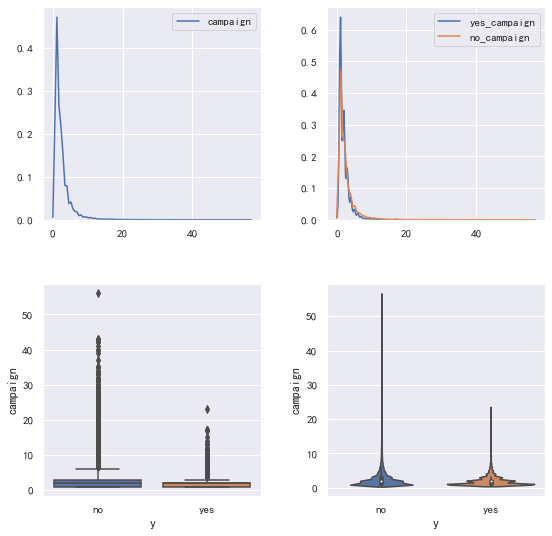

In [35]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.kdeplot(df_BankMarketing['campaign'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['campaign']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['campaign']
sns.kdeplot(y,label="yes_campaign")
sns.kdeplot(n,label="no_campaign")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='campaign',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='campaign',data=df_BankMarketing)

### 3.2.5 距离上次联系的天数

In [36]:
a = df_BankMarketing[['pdays','y']]

In [37]:
a

,pdays,y
0,999,no
1,999,no
2,999,no
3,999,no
4,999,no
...,...,...
40782,999,yes
40783,999,no
40784,999,no
40785,999,yes


In [38]:
# 999表示从来没有联系过，需要过滤掉这种数据
for i in range(0,len(a)):
    if a.loc[i,'pdays'] == 999:
        a.loc[i,'pdays'] = np.NAN

D:\conda\envs\py36\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:

#删除缺失值
a = a.dropna()

In [40]:
a

,pdays,y
23831,6.0,no
23986,4.0,no
24001,4.0,no
24119,3.0,no
24204,4.0,no
...,...,...
40762,4.0,yes
40763,10.0,yes
40773,1.0,yes
40777,6.0,yes


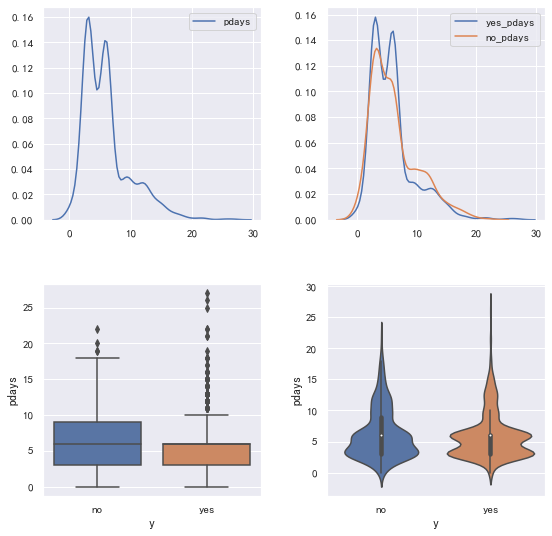

In [41]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.kdeplot(a['pdays'])

plt.subplot(2,2,2)
y = a[a['y'] == 'yes']['pdays']
n = a[a['y'] == 'no']['pdays']
sns.kdeplot(y,label="yes_pdays")
sns.kdeplot(n,label="no_pdays")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='pdays',data=a)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='pdays',data=a)

### 3.2.6 之前营销活动中联系的次数

In [42]:
df_BankMarketing['previous'].value_counts()

0    35217
1     4522
2      740
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

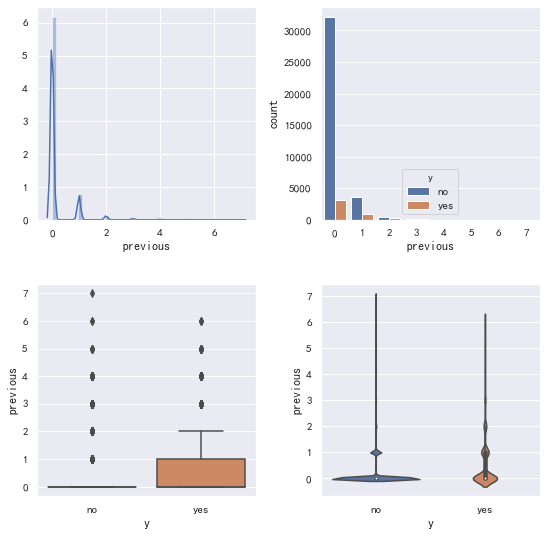

In [43]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.distplot(df_BankMarketing['previous'])

plt.subplot(2,2,2)
sns.countplot(x='previous',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

plt.subplot(2,2,3)
sns.boxplot(x='y',y='previous',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='previous',data=df_BankMarketing)

### 3.2.7 上次营销活动的结果

In [44]:
df_BankMarketing['poutcome'].value_counts()

nonexistent    35217
failure         4221
success         1349
Name: poutcome, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

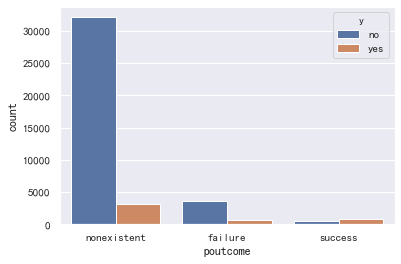

In [45]:
sns.countplot(x='poutcome',hue='y',data=df_BankMarketing)
plt.xticks(rotation=0)

Text(0.5, 1.0, 'no')

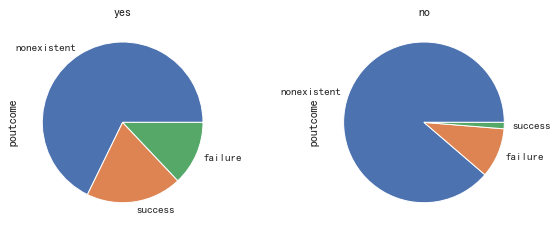

In [46]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.5, hspace =0)#调整子图间距

plt.subplot(1,2,1)
df_BankMarketing[df_BankMarketing['y']=='yes']['poutcome'].value_counts().plot(kind='pie')
plt.title('yes')

plt.subplot(1,2,2)
df_BankMarketing[df_BankMarketing['y']=='no']['poutcome'].value_counts().plot(kind='pie')
plt.title('no')

## 3.3 宏观经济特征

### 3.3.1 就业变动率

就业情况好--收入稳定--消费意愿增强--存款意愿下降

In [47]:
df_BankMarketing['emp.var.rate'].value_counts()

 1.4    16070
-1.8     9128
 1.1     7652
-0.1     3672
-2.9     1638
-3.4     1053
-1.7      763
-1.1      631
-3.0      170
-0.2       10
Name: emp.var.rate, dtype: int64

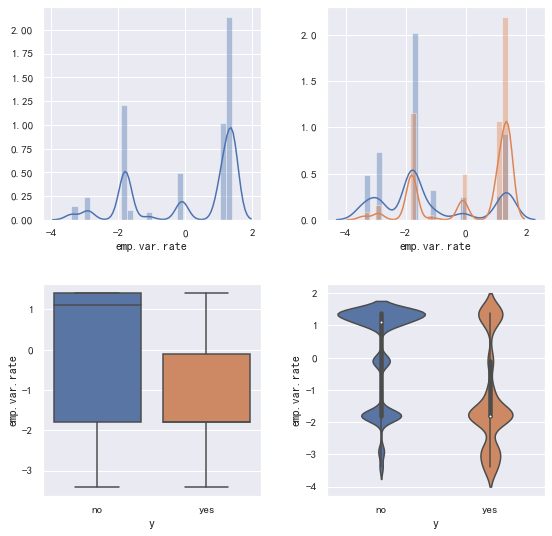

In [48]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.distplot(df_BankMarketing['emp.var.rate'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['emp.var.rate']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['emp.var.rate']
sns.distplot(y,label="yes_emp")
sns.distplot(n,label="no_emp")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='emp.var.rate',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='emp.var.rate',data=df_BankMarketing)

### 3.3.2 CCI消费者信心指数

由消费者满意指数和消费者预期指数构成，前者指消费者对当前经济生活的评价，后者指消费者对未来经济生活发生变化的预期。是从消费者角度反映经济总体状况的一个有预测作用的先行指标。

CCI上升--经济状况良好--反映收入在上升--存款意愿上升

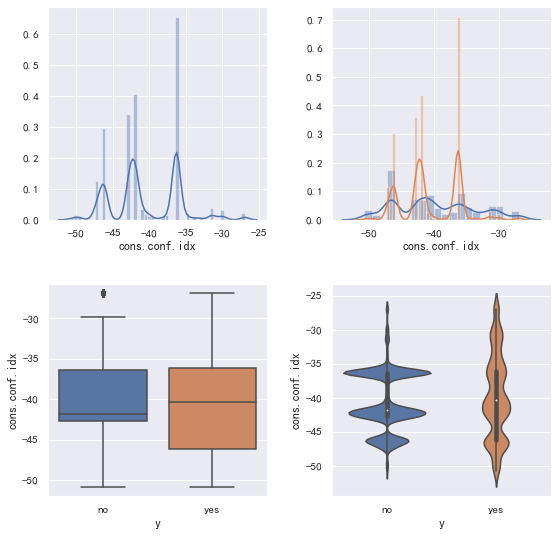

In [49]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.distplot(df_BankMarketing['cons.conf.idx'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['cons.conf.idx']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['cons.conf.idx']
sns.distplot(y,label="yes_cons")
sns.distplot(n,label="no_cons")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='cons.conf.idx',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='cons.conf.idx',data=df_BankMarketing)

### 3.3.3 3个月欧元同业拆借利率

欧洲银行间的欧元同业拆借利率，同业拆借利率指金融机构同业之间的短期资金借贷利率，该利率可以及时体现资金供求关系，这实质上是因为资金在银行间的分布不均匀造成的。一共有两个利率，拆进利率表示金融机构愿意借款的利率；拆出利率表示金融机构愿意贷款的利率。该利率是货币市场的基准利率。

同业拆借率下降--货币供给上升--短期内收入上升--存款意愿上升

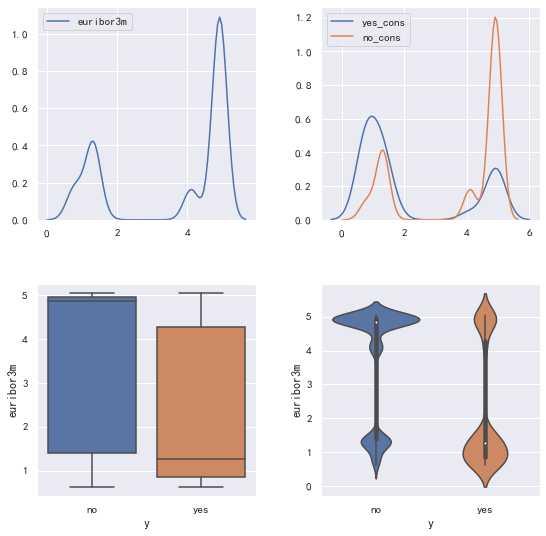

In [50]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.kdeplot(df_BankMarketing['euribor3m'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['euribor3m']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['euribor3m']
sns.kdeplot(y,label="yes_cons")
sns.kdeplot(n,label="no_cons")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='euribor3m',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='euribor3m',data=df_BankMarketing)

### 3.3.4 就业人数

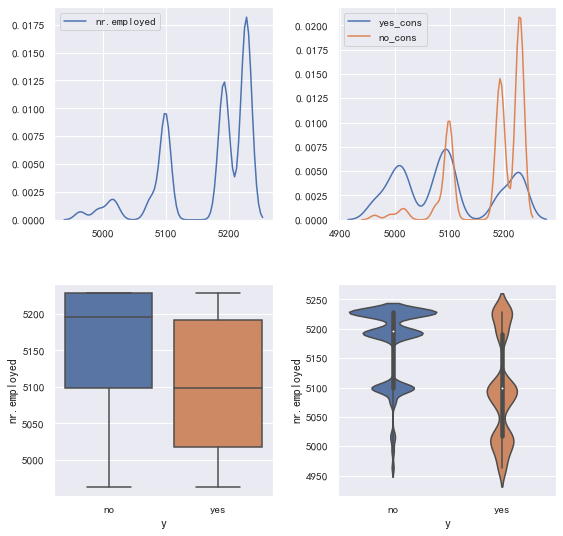

In [51]:
plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距

plt.subplot(2,2,1)
sns.kdeplot(df_BankMarketing['nr.employed'])

plt.subplot(2,2,2)
y = df_BankMarketing[df_BankMarketing['y'] == 'yes']['nr.employed']
n = df_BankMarketing[df_BankMarketing['y'] == 'no']['nr.employed']
sns.kdeplot(y,label="yes_cons")
sns.kdeplot(n,label="no_cons")

plt.subplot(2,2,3)
sns.boxplot(x='y',y='nr.employed',data=df_BankMarketing)

plt.subplot(2,2,4)
sns.violinplot(x='y',y='nr.employed',data=df_BankMarketing)

# 4 特征工程 

## 4.1 类别型特征的数值化编码

In [52]:
# 工作类型
job_du = pd.get_dummies(df_BankMarketing['job'],prefix='job')
job_du.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [53]:
# 婚姻状况
marital_du = pd.get_dummies(df_BankMarketing['marital'],prefix='marital')
marital_du.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [54]:
#教育背景
#但是教育背景的不同阶段是有包含关系的
#有包含关系的属性值改为1,1表示经历过该教育阶段
education_du = pd.get_dummies(df_BankMarketing['education'],prefix='education')
education_du.head()

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0


In [55]:
a_education_du = education_du.astype(int)
order = ['education_illiterate','education_unknown','education_basic.4y',
         'education_basic.6y','education_basic.9y','education_high.school',
        'education_professional.course','education_university.degree']
or_edu = a_education_du[order]
or_edu.head()

,education_illiterate,education_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0


In [56]:
for i in range(0,len(or_edu)):
    if or_edu.iloc[i,3] == 1:
        or_edu.iloc[i,2] == 1
    if or_edu.iloc[i,4] == 1:
        or_edu.iloc[i,3] == 1
        or_edu.iloc[i,2] == 1
    if or_edu.iloc[i,5] == 1:
        or_edu.iloc[i,4] == 1
        or_edu.iloc[i,3] == 1
        or_edu.iloc[i,2] == 1
    if or_edu.iloc[i,6] == 1:
        or_edu.iloc[i,5] == 1
        or_edu.iloc[i,4] == 1
        or_edu.iloc[i,3] == 1
        or_edu.iloc[i,2] == 1
    if or_edu.iloc[i,7] == 1:
        or_edu.iloc[i,6] == 1
        or_edu.iloc[i,5] == 1
        or_edu.iloc[i,4] == 1
        or_edu.iloc[i,3] == 1
        or_edu.iloc[i,2] == 1

or_edu.head()

,education_illiterate,education_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0


In [57]:
# 信贷违约
# 采用map方法来实现特征的数值化编码
default = pd.DataFrame(df_BankMarketing['default'].map({'no':-1,'unknown':0,'yes':1}))
default.head()

,default
0,-1
1,0
2,-1
3,-1
4,-1


In [58]:
# 房贷与个人贷款
housing = pd.DataFrame(df_BankMarketing['housing'].map({'no':-1,'unknown':0,'yes':1}))
loan = pd.DataFrame(df_BankMarketing['loan'].map({'no':-1,'unknown':0,'yes':1}))

In [59]:
# 联系方式
contact = pd.DataFrame(df_BankMarketing['contact'].map({'telephone':1,'cellular':0}))

In [60]:
# 月份和星期也采用数值化编码来表示
month_du = pd.get_dummies(df_BankMarketing['month'],prefix='month')
m_ord = ['month_mar','month_apr','month_may','month_jun',
         'month_jul','month_aug','month_sep','month_oct',
        'month_nov','month_dec']
ord_month = month_du[m_ord]
ord_month.head()

,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [61]:
day_du = pd.get_dummies(df_BankMarketing['day_of_week'],prefix='day')
d_ord = ['day_mon','day_tue','day_wed','day_thu','day_fri']
ord_day = day_du[d_ord]
ord_day.head()

,day_mon,day_tue,day_wed,day_thu,day_fri
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [62]:
# 上次营销结果
poutcome = pd.DataFrame(df_BankMarketing['poutcome'].map({'nonexistent':0,'failure':-1,'success':1}))
poutcome.head()

,poutcome
0,0
1,0
2,0
3,0
4,0


In [63]:
# 标签的数值化
# 标签表示是否订购定期存款产品，是就用1来表示，不是就用0来表示
# 我们使用sklearn中的标签编码方法

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_BankMarketing['y'])
le.classes_
le.transform(df_BankMarketing['y'])

y = pd.DataFrame(le.transform(df_BankMarketing['y']),columns=['y'])

#看看y中不同值的个数
from collections import Counter
Counter(y['y'])

Counter({0: 36193, 1: 4594})

## 4.2 特征的标准化

In [64]:
#特征的标准化主要是对一些连续的数值型特征进行处理,调整数据分布的方差和均值，调整数据的规模
from sklearn import preprocessing
age_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['age']),columns=['age_st'])
duration_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['duration']),columns=['duration_st'])
campaign_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['campaign']),columns=['campaign_st'])
pdays_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['pdays']),columns=['pdays_st'])
previous_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['previous']),columns=['previous_st'])
evr_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['emp.var.rate']),columns=['emp.var.rate_st'])
cpi_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['cons.price.idx']),columns=['cons.price.idx_st'])
cci_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['cons.conf.idx']),columns=['cons.conf.idx_st'])
e3m_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['euribor3m']),columns=['euribor3m_st'])
nem_scaled = pd.DataFrame(preprocessing.scale(df_BankMarketing['nr.employed']),columns=['nr.employed_st'])

In [65]:
#将数值化和标准化之后的数据整合在一起，并保存
bank_st = pd.concat([age_scaled,job_du,marital_du,or_edu,default,housing,loan,
                contact,ord_month,ord_day,duration_scaled,campaign_scaled,
                pdays_scaled,previous_scaled,poutcome,
                evr_scaled,cpi_scaled,cci_scaled,
                e3m_scaled,nem_scaled,y],axis=1)
bank_st.head()

,age_st,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,campaign_st,pdays_st,previous_st,poutcome,emp.var.rate_st,cons.price.idx_st,cons.conf.idx_st,euribor3m_st,nr.employed_st,y
0,1.540198,0,0,0,1,0,0,0,0,0,...,-0.565778,0.19472,-0.349341,0,0.649306,0.724561,0.88956,0.713487,0.33202,0
1,1.636333,0,0,0,0,0,0,0,1,0,...,-0.565778,0.19472,-0.349341,0,0.649306,0.724561,0.88956,0.713487,0.33202,0
2,-0.286369,0,0,0,0,0,0,0,1,0,...,-0.565778,0.19472,-0.349341,0,0.649306,0.724561,0.88956,0.713487,0.33202,0
3,0.002036,1,0,0,0,0,0,0,0,0,...,-0.565778,0.19472,-0.349341,0,0.649306,0.724561,0.88956,0.713487,0.33202,0
4,1.540198,0,0,0,0,0,0,0,1,0,...,-0.565778,0.19472,-0.349341,0,0.649306,0.724561,0.88956,0.713487,0.33202,0


## 4.3 样本的均衡性

In [66]:
from sklearn.manifold import TSNE

x = pd.DataFrame(bank_st.iloc[:,0:52]) 
x_tsne = TSNE(n_components=2,perplexity=5,random_state=0).fit_transform(x)
tsne_df_5 = pd.DataFrame(x_tsne,columns=['x1','x2'])
tsne_df_5['y'] = bank_st['y']
tsne_df_5.head()

,x1,x2,y
0,25.747852,-49.963905,0
1,48.061104,-63.627972,0
2,-21.916546,-38.609749,0
3,39.836262,-67.300858,0
4,35.883713,-21.437273,0


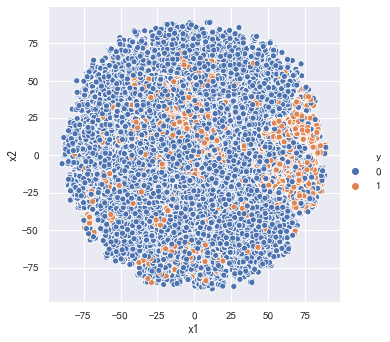

In [67]:
sns.relplot(x="x1", y="x2",hue="y",
            data=tsne_df_5)

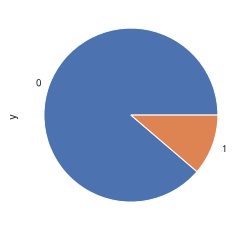

In [68]:
bank_st['y'].value_counts().plot(kind='pie')

In [78]:
#通过两幅图可以观察到，该数据集是非常不均衡的
#需要通过采样来改善样本的均衡性
#组合采样方法--SMOTEENN

bank_data = pd.DataFrame(bank_st.iloc[:,0:52])
bank_target = pd.DataFrame(bank_st.iloc[:,52])

from imblearn.combine import SMOTEENN
stn = SMOTEENN()
bank_data_co, bank_target_co = stn.fit_sample(bank_data,bank_target)

Using TensorFlow backend.


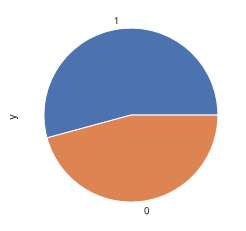

In [79]:
#对采样后的样本均衡性进行检测
b = pd.DataFrame(bank_target_co)
b['y'].value_counts().plot(kind='pie')

## 4.4 特征选择

In [86]:
#方差过滤
from sklearn.feature_selection import VarianceThreshold

bank_data_v = VarianceThreshold(0.1).fit_transform(bank_data_co)

In [89]:
bank_data_v = pd.DataFrame(bank_data_v)
bank_data_v

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.540198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,...,0.010299,-0.565778,0.194720,-0.349341,0.0,0.649306,0.724561,0.889560,0.713487,0.332020
1,1.636333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,...,-0.421689,-0.565778,0.194720,-0.349341,0.0,0.649306,0.724561,0.889560,0.713487,0.332020
2,-0.286369,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,1.0,...,-0.124697,-0.565778,0.194720,-0.349341,0.0,0.649306,0.724561,0.889560,0.713487,0.332020
3,0.002036,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,...,-0.413975,-0.565778,0.194720,-0.349341,0.0,0.649306,0.724561,0.889560,0.713487,0.332020
4,1.540198,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,-1.0,...,0.187723,-0.565778,0.194720,-0.349341,0.0,0.649306,0.724561,0.889560,0.713487,0.332020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,-1.517444,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,...,0.268167,0.156748,-5.139542,1.671445,1.0,-0.751867,1.078894,0.651812,-1.576547,-2.816214
65615,-1.348055,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,1.0,...,-0.273885,-0.549993,0.194720,-0.349341,0.0,-1.197694,-0.863890,-1.423079,-1.267915,-0.940287
65616,0.073995,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,...,-0.017382,0.449873,0.194720,-0.349341,0.0,-0.751867,2.060657,-2.222777,-1.487715,-2.816214
65617,-0.563153,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,...,1.294184,-0.478435,0.194720,-0.349341,0.0,-1.197694,-1.178469,-1.228558,-1.348327,-0.940287


In [91]:
#相关性过滤--互信息值
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score


#参数选择（我们采用的模型为随机森林模型）
from sklearn.ensemble import RandomForestClassifier as RFC
score = []
for i in range(31,1,-2):
    bank_data_mul = SelectKBest(mutual_info_classif,k=i).fit_transform(bank_data_v,bank_target_co)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),bank_data_mul,bank_target_co,cv=5).mean()
    score.append(once)


D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\conda\envs\py36\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

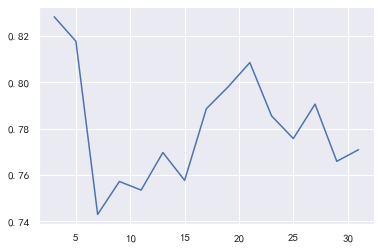

In [99]:
x_plt = np.arange(31,1,-2)
plt.plot(x_plt,score)
plt.show()

In [101]:
#参数选择（我们采用的模型为决策树模型）
from sklearn.tree import DecisionTreeClassifier as DTC
score = []
for i in range(31,1,-2):
    bank_data_mul = SelectKBest(mutual_info_classif,k=i).fit_transform(bank_data_v,bank_target_co)
    once = cross_val_score(DTC(),bank_data_mul,bank_target_co,cv=5).mean()
    score.append(once)

D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

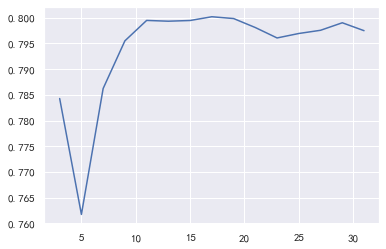

In [102]:
x_plt = np.arange(31,1,-2)
plt.plot(x_plt,score)
plt.show()

In [103]:
#整体来看决策树模型的效果比较好而且稳定
#选择留下的特征的数量设置为15
bank_data_mul = SelectKBest(mutual_info_classif,k=15).fit_transform(bank_data_v,bank_target_co)

D:\conda\envs\py36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5 模型的建立与训练

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bank_data_mul,bank_target_co,test_size=0.3, 
                                                 random_state=22)

In [106]:
#建立决策树模型
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=22,splitter='random')

In [107]:
#训练模型
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='random')

In [108]:
#模型评估
acc = clf.score(x_test,y_test)
print(acc)

0.9548918012800975
